In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans, dbscan
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import random

from mpl_toolkits.mplot3d import Axes3D
# Descomentar no final
#import warnings
#warnings.filterwarnings('ignore')


# import gi
# gi.require_version('Gtk', '3.0')
# from gi.repository import Gtk

# from matplotlib.figure import Figure
# from matplotlib.backends.backend_gtk3agg import FigureCanvas
# from matplotlib.backends.backend_gtk3 import (NavigationToolbar2GTK3 as NavigationToolbar)

### Metodos auxiliares

In [2]:
def plot_with_window(fig):
    
    win = Gtk.Window()
    win.connect("destroy", lambda x: Gtk.main_quit())
    win.set_default_size(400,300)
    win.set_title("Embedding in GTK")

    vbox = Gtk.VBox()
    win.add(vbox)

    canvas = FigureCanvas(fig)  # a Gtk.DrawingArea
    vbox.pack_start(canvas, True, True, 0)
    toolbar = NavigationToolbar(canvas, win)
    vbox.pack_start(toolbar, False, False, 0)

    win.show_all()
    Gtk.main()

In [3]:
columns = ["ID","ACC_X","ACC_Y","ACC_Z","GYRO_X","GYRO_Y","GYRO_Z","MAG_X","MAG_Y","MAG_Z","TIMESTAMP","ACT_LABEL"] 
part = "0"
dev = "1"

<h1>Import Data</h1>

In [4]:
my_data = np.genfromtxt('FORTH_TRACE_DATASET/part'+part+'/part'+part+'dev'+dev+'.csv', delimiter=',')
data = pd.DataFrame(my_data, columns = columns) 
data

,ID,ACC_X,ACC_Y,ACC_Z,GYRO_X,GYRO_Y,GYRO_Z,MAG_X,MAG_Y,MAG_Z,TIMESTAMP,ACT_LABEL
0,1.0,-1.8650,9.3890,2.5812,-1.14180,-1.185600,0.849980,-0.34476,0.59839,1.01340,505.89,1.0
1,1.0,-1.7963,9.3742,2.4460,-1.56180,-0.661650,0.597300,-0.34274,0.57631,1.00000,525.42,1.0
2,1.0,-1.8696,9.3000,2.3514,-1.18770,-1.284100,0.142120,-0.34476,0.59639,1.01560,544.95,1.0
3,1.0,-1.7961,9.3624,2.4584,-0.58399,-2.033400,0.429120,-0.32863,0.62249,1.01560,564.48,1.0
4,1.0,-1.6768,9.3506,2.4685,-0.37050,-1.364700,0.371940,-0.33669,0.62048,1.02450,584.01,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
53115,1.0,-2.2033,9.3479,2.3327,-1.50120,-0.092005,-0.117810,0.22581,0.87751,0.53898,1037900.00,1.0
53116,1.0,-2.1798,9.3235,2.3205,-1.59020,-0.091795,-0.007825,0.21169,0.89759,0.53898,1037900.00,1.0
53117,1.0,-2.1324,9.3112,2.3076,-1.69930,-0.379580,0.132570,0.22379,0.90361,0.54343,1037900.00,1.0
53118,1.0,-2.1327,9.3110,2.2955,-1.55450,-0.241180,0.180670,0.22782,0.89558,0.55234,1038000.00,1.0


<h1>Ex 3.1</h1>

In [5]:
activities = [i + 1 for i in range(16)]
activities_labels = ["palha","Stand", "Sit", "Sit and Talk", "Walk", "Walk and Talk", "Climb Stair", "Climb Stair and Talk", "Stand to Sit", "Sit to Stand", "Stand to Sit and Talk", "Sit to Stand and Talk", "Stand to Walk", "Walk to Stand", "Stand to Climb Stairs / Stand to Climb Stairs and Talk", "Climb Stairs to Walk", "Climb Stairs and Talk to Walk and Talk"]

In [6]:
activities

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [7]:
def return_activity(data,act):
    return data[data["ACT_LABEL"]==act]

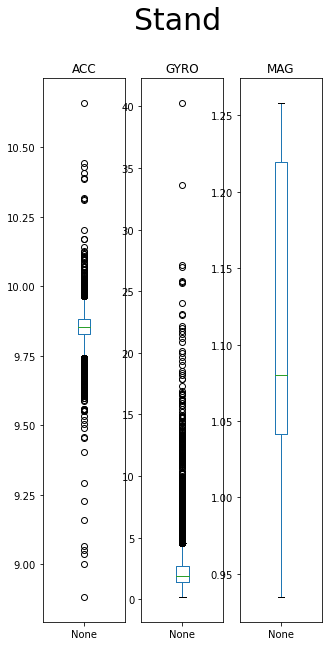

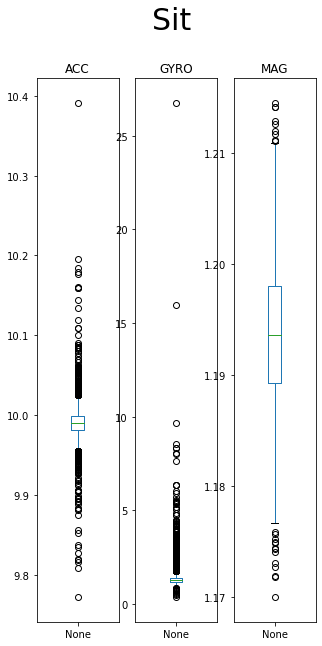

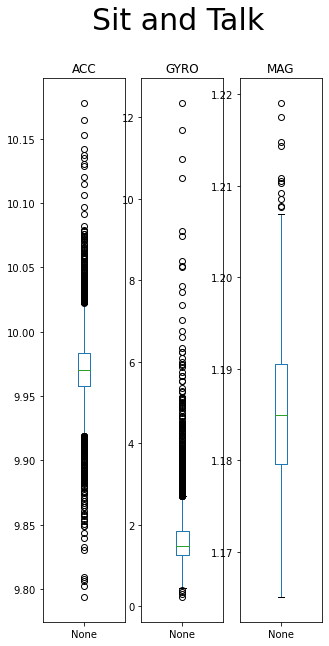

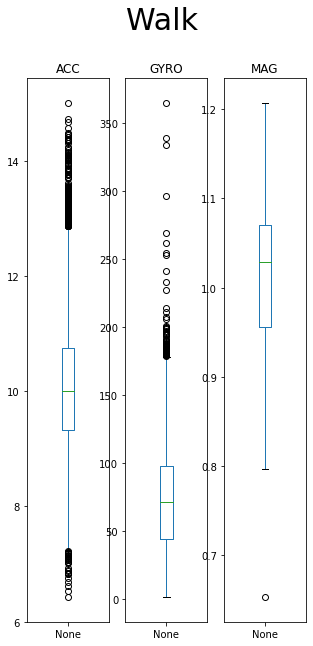

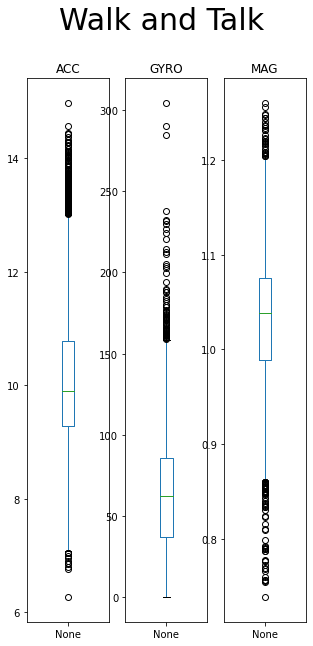

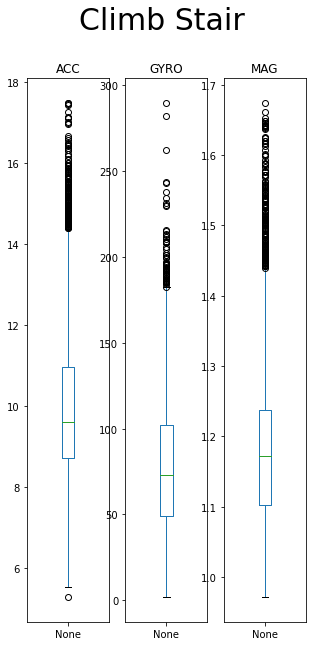

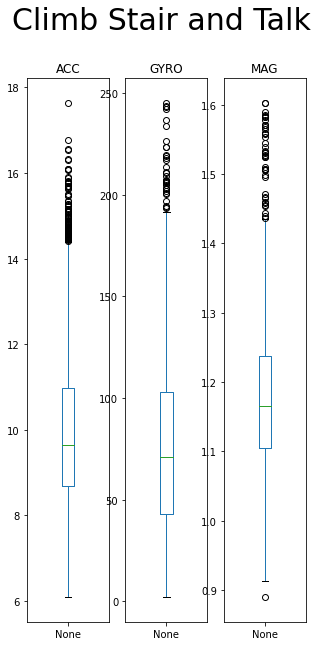

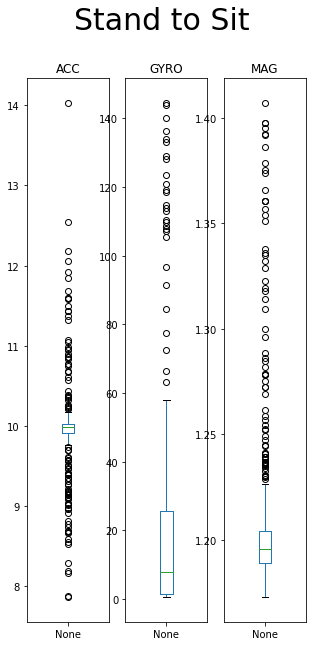

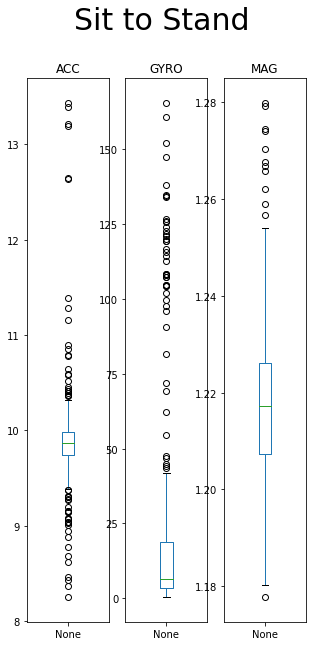

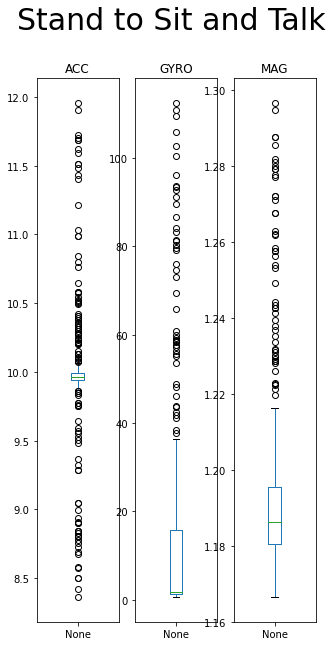

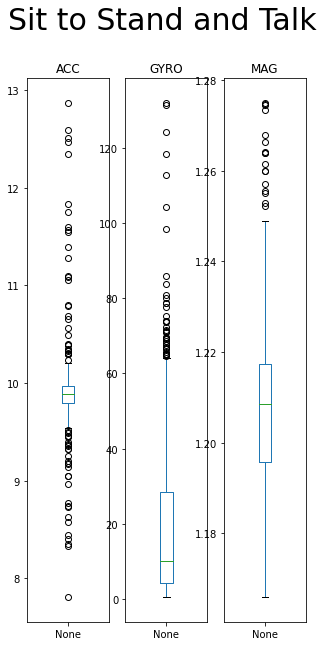

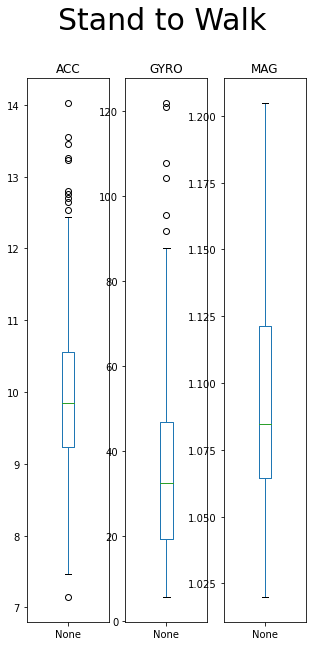

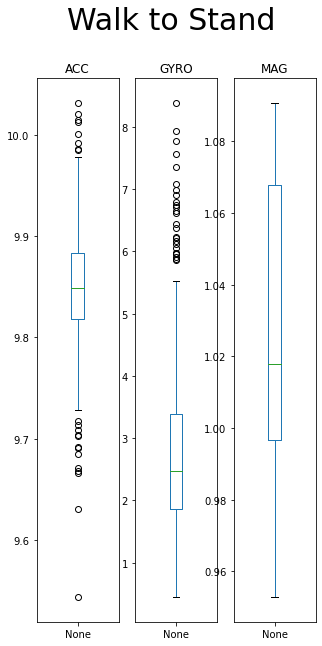

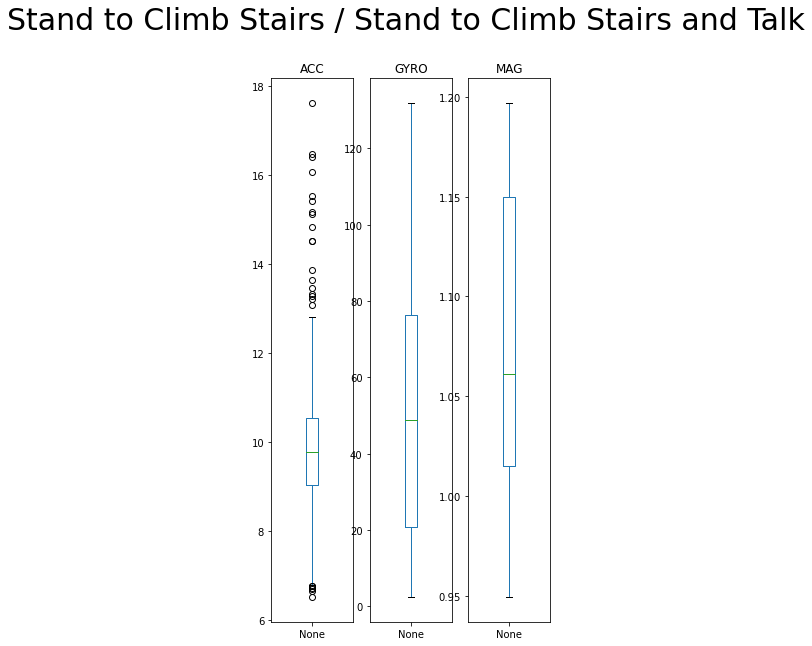

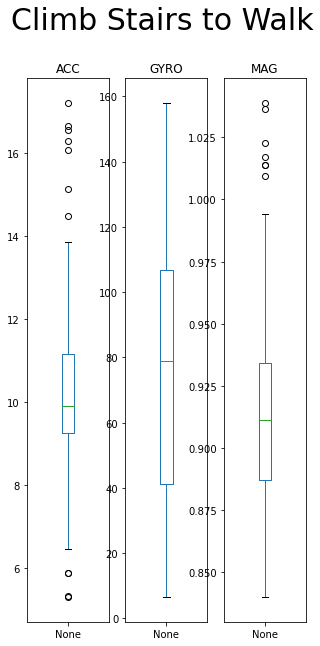

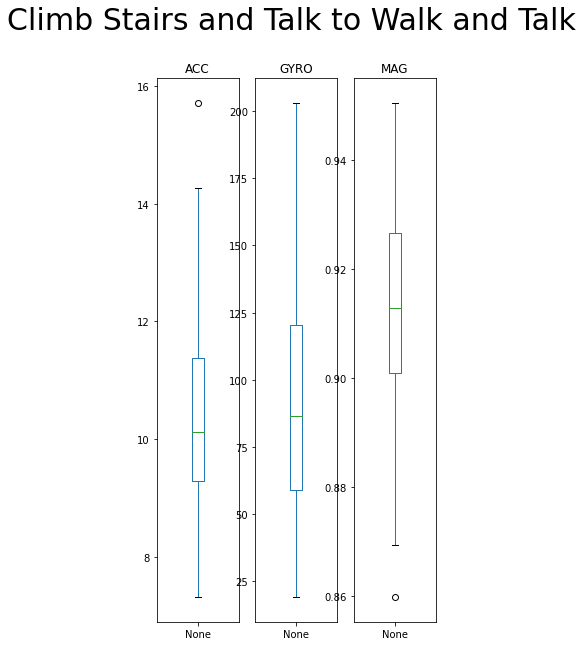

In [8]:
transformed_data = {}
for act in activities:
    modulo = return_activity(data,act)  
    ACC_BOX_PLOT = np.sqrt(pow(modulo["ACC_X"],2) + pow(modulo["ACC_Y"],2) + pow(modulo["ACC_Z"],2))
    GYRO_BOX_PLOT = np.sqrt(pow(modulo["GYRO_X"],2) + pow(modulo["GYRO_Y"],2) + pow(modulo["GYRO_Z"],2))
    MAG_BOX_PLOT = np.sqrt(pow(modulo["MAG_X"],2) + pow(modulo["MAG_Y"],2) + pow(modulo["MAG_Z"],2))
    frame = { 'ACC': ACC_BOX_PLOT, 'GYRO': GYRO_BOX_PLOT,'MAG': MAG_BOX_PLOT} 
    join_series = pd.DataFrame(frame) 
    transformed_data[activities_labels[act]] = join_series
  

    fig,ax = plt.subplots(1,3)
    fig.suptitle(activities_labels[act], fontsize=30)
    
    plt.subplot(131)
    plt.title("ACC")
    ACC_BOX_PLOT.plot.box(figsize = (5,10))
       
    plt.subplot(132)
    plt.title("GYRO")
    GYRO_BOX_PLOT.plot.box(figsize = (5,10))
    
    plt.subplot(133)
    plt.title("MAG")
    MAG_BOX_PLOT.plot.box(figsize = (5,10))



<h1>Ex 3.2</h1>
<p>formula para calcular outliers -> k * IQR</p>
<p>Esta parte está feita, agora é só meter esta merda num for e fazer uma tabela toda pipi</p>
<p>Até podemos fazer um grafico para ser mais facil de visualizar que dados têm mais outliers</p>
<p> x - tipo de sensor | y - atividade</p>

In [9]:
def density(data,nr,k):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    ul = k*IQR + Q3
    ll = -k*IQR + Q1
    n0 =  len(data[(data > ul) | (data < ll)])
    return float(n0)/float(nr) * 100.0

In [10]:
k = 1.5
nr = len(transformed_data["Stand"]['MAG'])
sensors = ['ACC','GYRO','MAG']
density_dataFrame = pd.DataFrame(columns=["Activity","Sensor","Density"])
for act in activities_labels[1:]:
    for sen in sensors:
        new_row = pd.Series(data={'Activity': act, 'Sensor': sen, 'Density': density(transformed_data[act][sen],nr,k)})
        density_dataFrame = density_dataFrame.append(new_row, ignore_index=True)
        
density_dataFrame

,Activity,Sensor,Density
0,Stand,ACC,3.496186
1,Stand,GYRO,7.618961
2,Stand,MAG,0.000000
3,Sit,ACC,2.070469
4,Sit,GYRO,3.995641
5,Sit,MAG,0.199782
6,Sit and Talk,ACC,2.860516
7,Sit and Talk,GYRO,2.996731
8,Sit and Talk,MAG,0.099891
9,Walk,ACC,2.097712


# Ex 3.3
## Aqui fazermos para um array qualquer de teste, é mesmo melhor ir buscar um à net para verificar resultados
### To Do: outliers usando o teste Z-Score para um k variável
https://www.youtube.com/watch?v=2tuBREK_mgE 
#### from scipy import stats 
#### np.abs(stats.zscore(df) < k 

## CONFIRMAR ISTO

#### Exemplo: 80,71,79,61,78,73,77,74,76,75,160,79,80,78,75,78,86,80,82,69,100,72,74,75,180,72,71,12
### Outliers: 160,100,180,12

In [11]:
def z_score(data,k):
    z_score=np.abs(stats.zscore(data))
    
    return data[z_score < k],data[z_score >= k]

In [12]:
data_teste=np.array([80,71,79,61,78,73,77,74,76,75,160,79,80,78,75,78,86,80,75,82,69,100,72,74,75,180,72,71,120])
z_score(data_teste,3)

(array([ 80,  71,  79,  61,  78,  73,  77,  74,  76,  75, 160,  79,  80,
         78,  75,  78,  86,  80,  75,  82,  69, 100,  72,  74,  75,  72,
         71, 120]),
 array([180]))

In [13]:
transformed_data['Stand']

,ACC,GYRO,MAG
0,9.914340,1.852517,1.226340
1,9.853184,1.798268,1.203995
2,9.773151,1.754919,1.227185
3,9.845011,2.158681,1.235692
4,9.815237,1.462196,1.244169
...,...,...,...
53115,9.883282,1.508624,1.054283
53116,9.852101,1.592866,1.068167
53117,9.827034,1.746218,1.077919
53118,9.824075,1.583439,1.076590


# Ex 3.4
## Z-Score


In [14]:
def graficos_z_score(label,act, transformed_data,density_dataFrame,toPlot,k):
    
    #plt.subplot(131)
    normal_data,outlier = z_score(transformed_data[act][label],k)
    if toPlot:
        plt.figure(figsize=(5, 10))
        plt.title(act + " / " + label)
        plt.plot(np.zeros_like(normal_data), normal_data, 'o',color="blue")
        plt.plot(np.zeros_like(outlier), outlier, 'x',color="red")
    density_dataFrame.loc[(density_dataFrame["Activity"] == act)&(density_dataFrame["Sensor"] == label),"Z-Score Density_"+str(k)] = len(outlier)/ (len(outlier)+len(normal_data))*100 


In [15]:
density_dataFrame.rename(columns = {'Density':'Density_Q'}, inplace = True) 
for k in np.linspace(3,4,3):
    density_dataFrame["Z-Score Density_"+str(k)] = np.nan
    for act in activities_labels[1:]:
        graficos_z_score("ACC",act ,transformed_data,density_dataFrame,False,k)
        graficos_z_score("GYRO",act ,transformed_data,density_dataFrame,False,k)
        graficos_z_score("MAG",act ,transformed_data,density_dataFrame,False,k)

# Ex 3.5


#### Podemos que quanto maior o k do Z-Score, menor vai ser a densidade de outliers do sinal

## Graficos e tabelas para justificar:

In [16]:
density_dataFrame

,Activity,Sensor,Density_Q,Z-Score Density_3.0,Z-Score Density_3.5,Z-Score Density_4.0
0,Stand,ACC,3.496186,1.044315,0.744642,0.581184
1,Stand,GYRO,7.618961,1.888849,1.443879,1.162368
2,Stand,MAG,0.000000,0.000000,0.000000,0.000000
3,Sit,ACC,2.070469,1.458333,1.076389,0.920139
4,Sit,GYRO,3.995641,1.163194,0.972222,0.833333
5,Sit,MAG,0.199782,0.243056,0.034722,0.000000
6,Sit and Talk,ACC,2.860516,1.927083,1.111111,0.659722
7,Sit and Talk,GYRO,2.996731,1.649306,1.250000,0.885417
8,Sit and Talk,MAG,0.099891,0.156250,0.069444,0.034722
9,Walk,ACC,2.097712,0.715072,0.242024,0.033003


In [17]:
# Simplesmente para ajudar no x label dos plots
# Falta adicionar mais legendas
density_dataFrame["x_label_aux"] = density_dataFrame["Activity"] +"  "+ density_dataFrame["Sensor"]

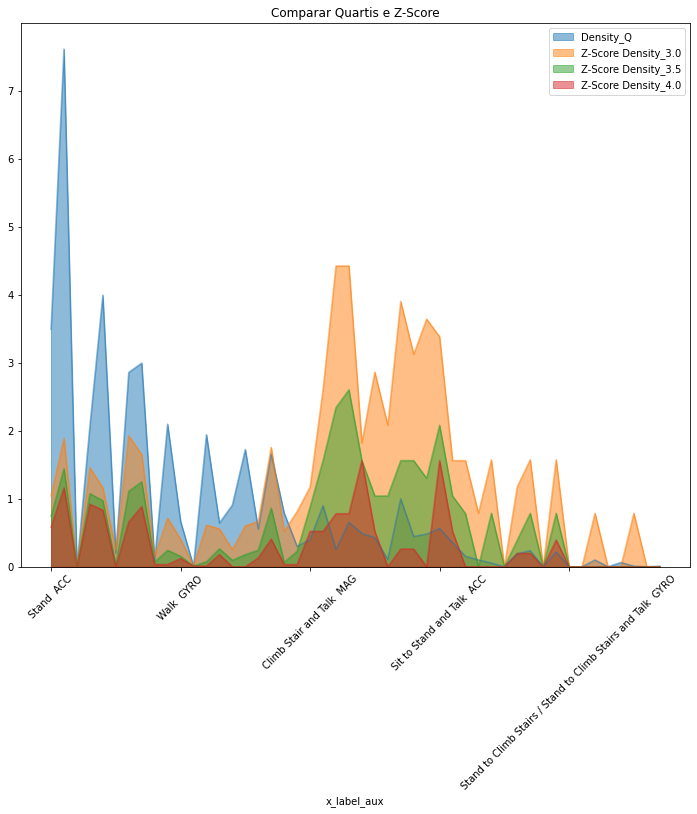

In [18]:
density_dataFrame.plot.area(figsize=(12, 10),stacked=False,x="x_label_aux")
plt.title("Comparar Quartis e Z-Score")
plt.xticks(rotation=45)
plt.show()

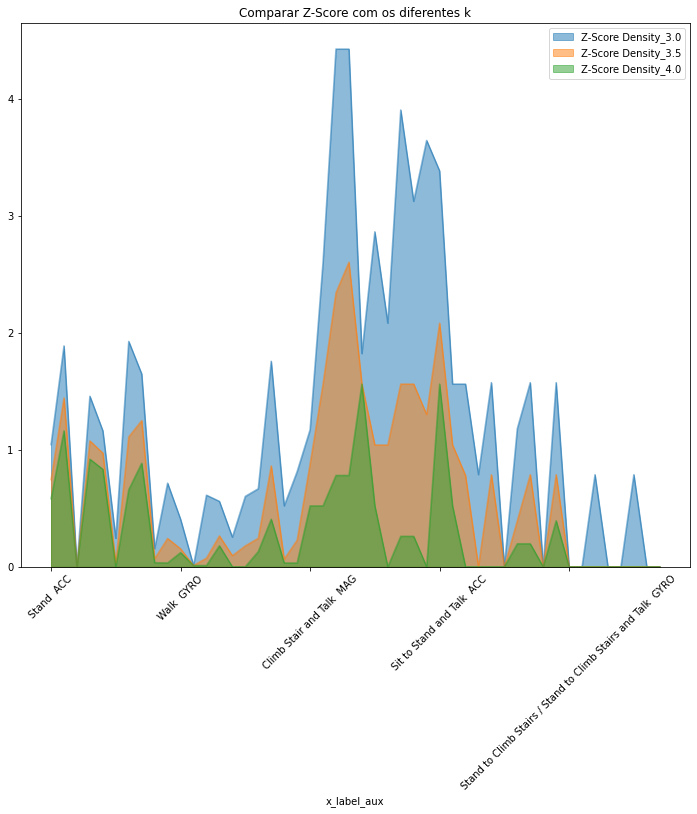

In [19]:
density_dataFrame[['x_label_aux','Z-Score Density_3.0','Z-Score Density_3.5','Z-Score Density_4.0']].plot.area(figsize=(12, 10),stacked=False,x="x_label_aux")

plt.title("Comparar Z-Score com os diferentes k")

plt.xticks(rotation=45)
plt.show()

# Ex 3.6
## estive a dar um cheirinho da documentação e isto já está tudo implementada no sklearn, copiar colar

In [20]:
def k_means(data,n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    return kmeans.fit_predict(data)


In [21]:
def k_mean_by_us(data,n_clusters,max_iterations):
    
    def calculate_distance(data,centroids):   
        data_2_manipulate = data[data.columns[:-1]].values
        all_clusters = []
        for index,row in enumerate(data_2_manipulate):
            distance = [np.linalg.norm(row - centroid) for centroid in centroids]
            cluster = distance.index(min(distance))
            all_clusters.append(cluster)
        data["centroids"] = all_clusters            
        return data
    
    def centroids_new_positions(data,n_clusters):
        list_clusters = []
        for i in range(n_clusters):
            list_clusters.append(data[data["centroids"] == i].mean().values[:-1])
        return list_clusters
    
    def recursive_kMeans(data,n_clusters,max_iterations,
        curr_iteration,list_clusters):
        
        prev_list_clusters = list_clusters
        data = calculate_distance(data,list_clusters)
        list_clusters = centroids_new_positions(data,n_clusters)
        if str(prev_list_clusters) == str(list_clusters) or curr_iteration > max_iterations:
            return data
        return recursive_kMeans(data,n_clusters,max_iterations,
        curr_iteration+1,list_clusters)
    
    # Preparar dados para o algoritmo
    data["centroids"] = -1
    clusters_start_index = random.choices(data.index, k=n_clusters)
    list_clusters = []
    for clust in clusters_start_index:
        coordinates = np.array([data.loc[clust]["ACC_X"],data.loc[clust]["ACC_Y"],data.loc[clust]["ACC_Z"]])
        list_clusters.append(coordinates)
    
        
    return recursive_kMeans(data,n_clusters,max_iterations,0,list_clusters)["centroids"]

In [22]:
data_to_clusterise = data[data["ACT_LABEL"] == act][["ACC_X","ACC_Y","ACC_Z"]]
print(k_mean_by_us(data_to_clusterise, 2, 100))

IndexError: index 0 is out of bounds for axis 0 with size 0

# Ex 3.7

### Não percebi a cena do 3D
### Como é que é suposto extrair os outliers, procurar os que têm menor tamanho?
Pela logica basta ter 3 clusters uma vez que estamos a trabalhar em apenas uma dimensão

In [23]:
upper_limits_n_clusters = 5
for act in activities_labels[1:]:
    for sen in sensors:
        for n_clusters in range(2,upper_limits_n_clusters+1):
              transformed_data[act][sen+"_k_means_"+str(n_clusters)] = k_means(transformed_data[act][[sen]],n_clusters)

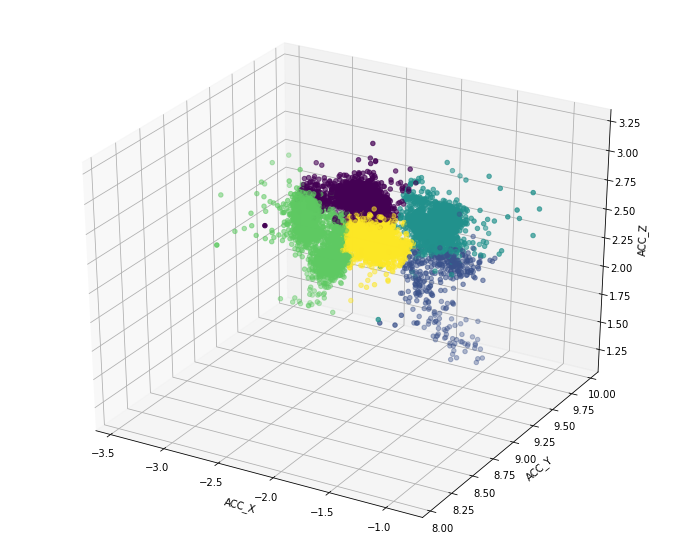

In [26]:
upper_limits_n_clusters = 5
n_clusters = 5
color = ["r","g","b","y","p"]
for act in activities:
    data_to_clusterise = data[data["ACT_LABEL"] == act][["ACC_X","ACC_Y","ACC_Z"]]
    
    
    #data_to_clusterise["clusters"] = k_means(data_to_clusterise,n_clusters)
    #k_mean_by_us(data_to_clusterise,n_clusters,100)
    data_to_clusterise["clusters"] = k_mean_by_us(data_to_clusterise,n_clusters,100)
    
    fig = plt.figure(figsize=(12, 10)).gca(projection='3d')
    fig.scatter(data_to_clusterise.ACC_X, data_to_clusterise.ACC_Y, data_to_clusterise.ACC_Z, c = data_to_clusterise.clusters)
    fig.set_xlabel('ACC_X')
    fig.set_ylabel('ACC_Y')
    fig.set_zlabel('ACC_Z')
    plt.show()
    break
#my_data

# 3.7 extra

In [ ]:
upper_limits_n_clusters = 5
n_clusters = 9
color = ["r","g","b","y","p"]
for act in activities:
    data_to_clusterise = data[data["ACT_LABEL"] == act][["ACC_X","ACC_Y","ACC_Z"]]
    data_to_clusterise["clusters"] = dbscan(data_to_clusterise,eps = 0.05, min_samples=1)[1]
    fig = plt.figure(figsize=(12, 10)).gca(projection='3d')
    fig.scatter(data_to_clusterise.ACC_X, data_to_clusterise.ACC_Y, data_to_clusterise.ACC_Z, c = data_to_clusterise.clusters)
    fig.set_xlabel('ACC_X')
    fig.set_ylabel('ACC_Y')
    fig.set_zlabel('ACC_Z')
    plt.show()
    break

In [ ]:
transformed_data["Stand"]

# Ex 3.7.1

# Ex 3.8
## Injetar outliers

In [ ]:
def calculate_density_z_score(data,k):
    nr,no =  z_score(data,k)
    nt = len(data)
    density = len(no)/nt*100.0
    return density

In [ ]:
def injeta_outliers(data,x_per,k):
    nr,no =  z_score(data,k)
    nt = len(data)
    density = len(no)/nt*100.0
    limite_max = 2
    while density < x_per:
        to_Add = round(len(nr)*(x_per - density)/100)+1
        to_replace = random.choices(nr.index, k=to_Add)
        mean = np.mean(data)
        std = np.std(data)
        for elem in to_replace:
            s = [-1,1][random.randrange(2)]
            q = random.random()*(mean+k*std)*limite_max
            nr.loc[elem] = mean + s * k * (std + q)
        data = nr.append(no)
        nr,no =  z_score(data,k)
        nt = len(data)
        density = len(no)/nt*100.0
        print(density)
    
    return data

In [ ]:
aux = injeta_outliers(data= transformed_data["Stand"]["ACC"],x_per = 4, k = 2.0)
print(calculate_density_z_score(aux,2),calculate_density_z_score(transformed_data["Stand"]["ACC"],2))

# Ex 3.9
## Modelo linear de ordem p

In [ ]:
def linear_model(vec, p):
    vec = vec.to_numpy()
    for i in range(len(vec)):
        x = np.arange(0, i + 1, 1)
        model = np.poly1d(np.polyfit(x, vec, p))
        model(x)
    #plt.scatter(x, vec, c="r")
    #plt.plot(x, model(x), c="b")
    #plt.show()

In [ ]:
# Se for um modelo linear (ordem 1)

data = np.array([[0, 5], [1, 10], [2, 13], [3, 15]])
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
reg = LinearRegression().fit(x, y)
y_predict = reg.predict(x)
plt.scatter(x, y, color="blue")
plt.plot(x, y_predict, color="red")
plt.show()
print("predict:", reg.predict(x))
print("score (r^2):", reg.score(x, y))
print("intercept:", reg.intercept_)
print("coefs:", reg.coef_)

In [ ]:
# Se for de uma ordem qualquer

y = transformed_data["Stand"]["ACC"]
linear_model(y, 2)